<a href="https://colab.research.google.com/github/AdityaTheEmpire/MLLAB/blob/main/DLExp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.4118 - loss: 3.2623 - val_accuracy: 0.6320 - val_loss: 1.8047
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6795 - loss: 1.6005 - val_accuracy: 0.7030 - val_loss: 1.3742
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7430 - loss: 1.2128 - val_accuracy: 0.7360 - val_loss: 1.1900
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7900 - loss: 0.9583 - val_accuracy: 0.7640 - val_loss: 1.0852
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8309 - loss: 0.7867 - val_accuracy: 0.7790 - val_loss: 1.0163
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8571 - loss: 0.6782 - val_accuracy: 0.7920 - val_loss: 0.9788
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8849 - loss: 0.5608 - val_accuracy: 0.7990 - val_loss: 0.9189
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8988 - loss: 0.4796 - val_accuracy: 0.8080 

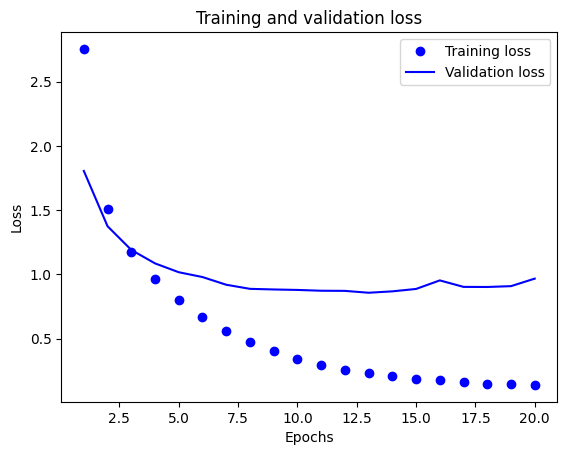

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3068 - loss: 3.1713 - val_accuracy: 0.6040 - val_loss: 1.8909
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6377 - loss: 1.7221 - val_accuracy: 0.6780 - val_loss: 1.4483
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7212 - loss: 1.2810 - val_accuracy: 0.7180 - val_loss: 1.2556
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7745 - loss: 1.0380 - val_accuracy: 0.7570 - val_loss: 1.1034
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8160 - loss: 0.8609 - val_accuracy: 0.7820 - val_loss: 1.0177
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8487 - loss: 0.7212 - val_accuracy: 0.8050 - val_loss: 0.9401
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8708 - loss: 0.6120 - val_accuracy: 0.8090 - val_loss: 0.8975
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9002 - loss: 0.4998 - val_accuracy: 0.8150 - val_loss:

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data)

len(test_data)

train_data[10]

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unkno

train_labels[10]

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

x_train,x_train.shape,x_train.ndim

data=[1,2,4,9,0]
x= vectorize_sequences(data)
x,x.shape,x.ndim

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)
one_hot_train_labels,one_hot_train_labels.shape,one_hot_train_labels.ndim

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
